In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
import itertools

from tqdm import tqdm
import pandas as pd
import numpy as np
import cv2

from glob import glob
import argparse
import sys
import ast
import os
from pathlib import Path

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (11,6)
legend_fontsize = 16

from tqdm import tqdm
from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('figure', **{'dpi': 300})

In [2]:
img_path = Path("/home/simba9/pet/shov/data_new/images/train/1 (1).jpg")
txt_path = Path(str(img_path.with_suffix(".txt")).replace("images", "labels"))

In [3]:
img = cv2.imread(img_path)
image_heigh, image_width, _ = img.shape#h, w, c 

color_values = [
    (255, 0, 0),
    (255, 255, 0),
    (0, 234, 255),
    (170, 0, 255),
    (255, 127, 0),
    (191, 255, 0)
]

In [4]:
annotation = open(txt_path).read()
class_to_points = []
for i, line in enumerate(annotation.splitlines()):
    class_id, *points = line.split()
    class_to_points.append([class_id, np.array(list(map(float, points))).reshape(-1, 1, 2)])
    class_to_points[i][1][:,:,0] = class_to_points[i][1][:,:,0] * image_width
    class_to_points[i][1][:,:,1] = class_to_points[i][1][:,:,1] * image_heigh
    class_to_points[i][1] = np.round(class_to_points[i][1])
    class_to_points[i][1] = class_to_points[i][1].astype(np.int32)
mask = np.zeros(shape=img.shape, dtype=np.uint8)
    

In [25]:
boxes = []
for i, data in enumerate(class_to_points):
    cat, pts = data
    cat = int(cat)
    #print(cat, pts)
    color_code = color_values[cat]

    mask = cv2.polylines(mask, [pts], True, color_code, 2)
    mask = cv2.fillPoly(mask, [pts], color=color_code)
    # create crops
    mask_copy = np.zeros(shape=img.shape, dtype=np.uint8)
    mask_copy = cv2.polylines(mask_copy, [pts], True, color_code, 2)
    mask_copy = cv2.fillPoly(mask_copy, [pts], color=color_code)
    mask_copy = cv2.cvtColor(mask_copy, cv2.COLOR_BGR2GRAY)
    contours, _ = cv2.findContours(mask_copy, cv2.RETR_EXTERNAL,
                                   cv2.CHAIN_APPROX_NONE)
    #print(contours)
    x,y,w,h = cv2.boundingRect(contours[0])
    boxes.append([x,y,w,h, cat])

In [26]:
for i, box in enumerate(boxes):
    x,y,w,h, cat = box
    color_code = color_values[cat]
    img = cv2.rectangle(img, (x, y), (x + w, y + h), color_code, 4)
    cv2.putText(img, str(cat), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color_code, 4)


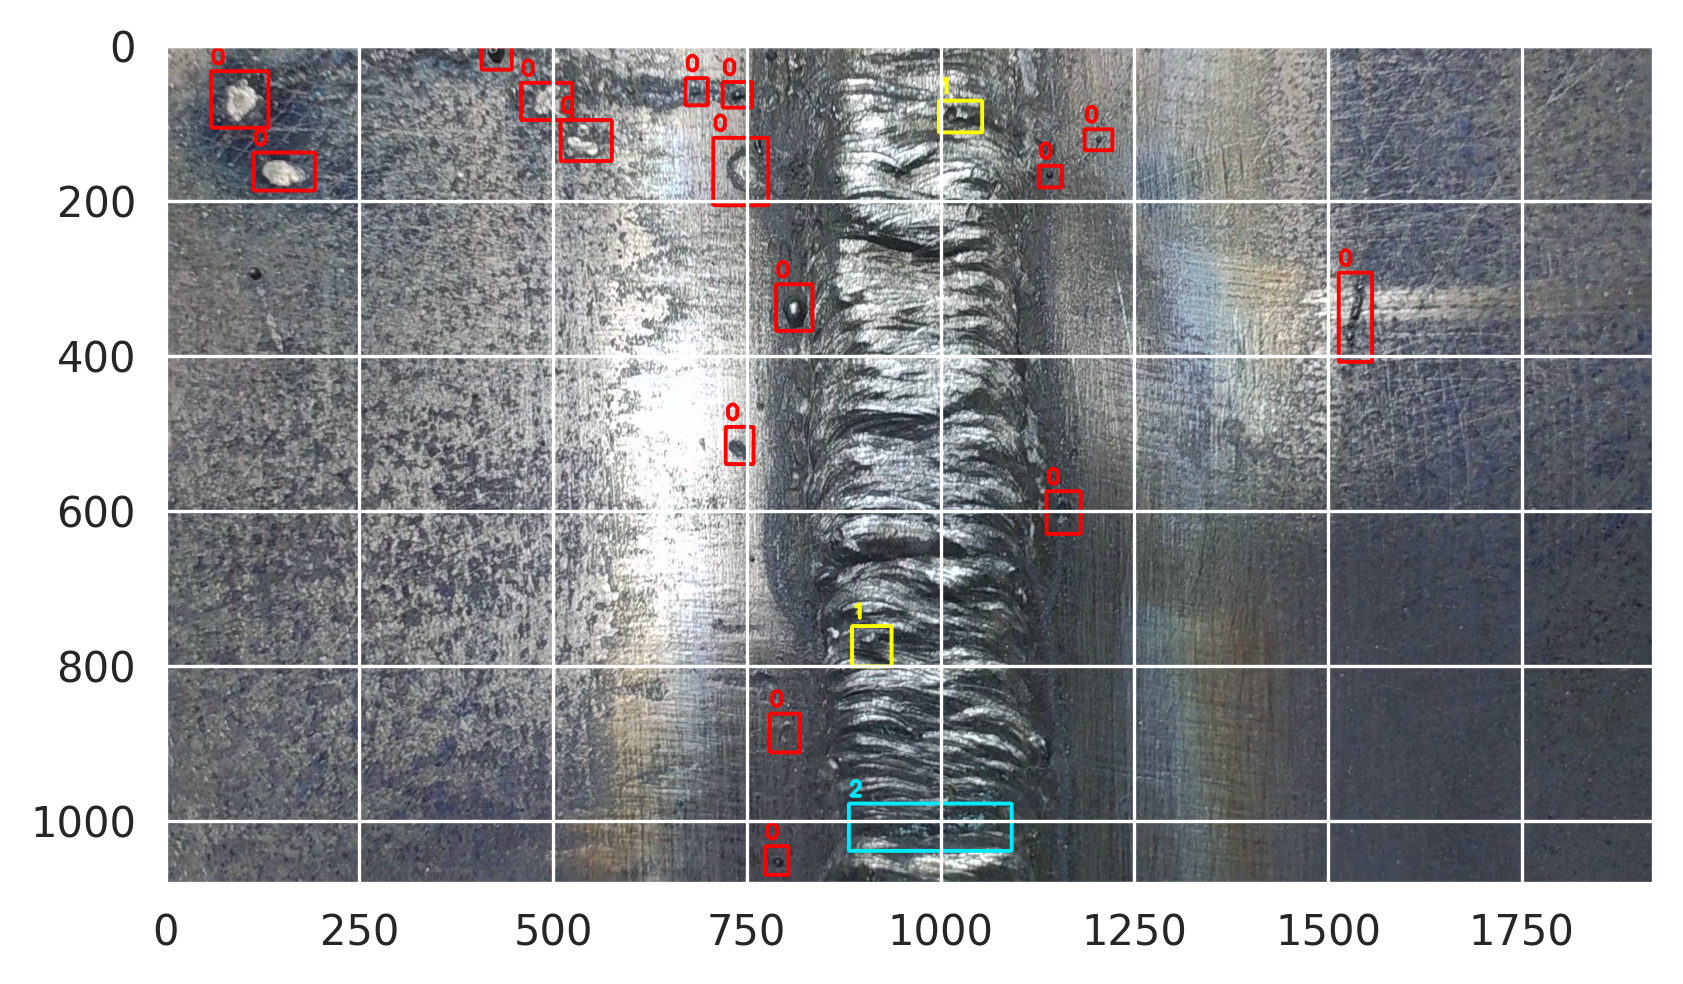

In [27]:
plt.imshow(img)
plt.show()

In [13]:
cv2.imwrite("img4.jpg", img)

True